# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
train_df = pd.read_csv('kc_house_data_train.csv', index_col = 0)
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [2]:
train_df['type'] = 'train'
test_df = pd.read_csv('kc_house_data_test_features.csv', index_col = 0)
test_df['type'] = 'test'

In [3]:
test_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,test
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,test
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576,test
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565,test
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test
4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,test
4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,test
4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,test


In [4]:
result = pd.concat([train_df, test_df])
result

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,263000018,20140521T000000,NaN,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test
4319,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,test
4320,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,test
4321,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,test


In [5]:
result.reset_index(inplace=True, drop=True)

In [7]:
result

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,NaN,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,test
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,test
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,test


In [8]:
import seaborn as sns

# sns.pairplot(result)

In [9]:
result.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'type'],
      dtype='object')

In [10]:
_eda = result[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','yr_built','type', 'lat', 'long']]

In [11]:
_eda

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,type,lat,long
0,4,2.25,2070,2.0,0,0,4,8,1986,train,47.4388,-122.162
1,5,3.00,2900,1.0,0,0,5,8,1977,train,47.6784,-122.285
2,4,2.50,3770,2.0,0,2,3,11,1997,train,47.5646,-122.129
3,3,3.50,4560,2.0,0,2,3,12,1990,train,47.6995,-122.228
4,3,2.50,2550,2.0,0,0,3,9,2004,train,47.6647,-122.083
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,3,8,2009,test,47.6993,-122.346
21609,4,2.50,2310,2.0,0,0,3,8,2014,test,47.5107,-122.362
21610,2,0.75,1020,2.0,0,0,3,7,2009,test,47.5944,-122.299
21611,3,2.50,1600,2.0,0,0,3,8,2004,test,47.5345,-122.069


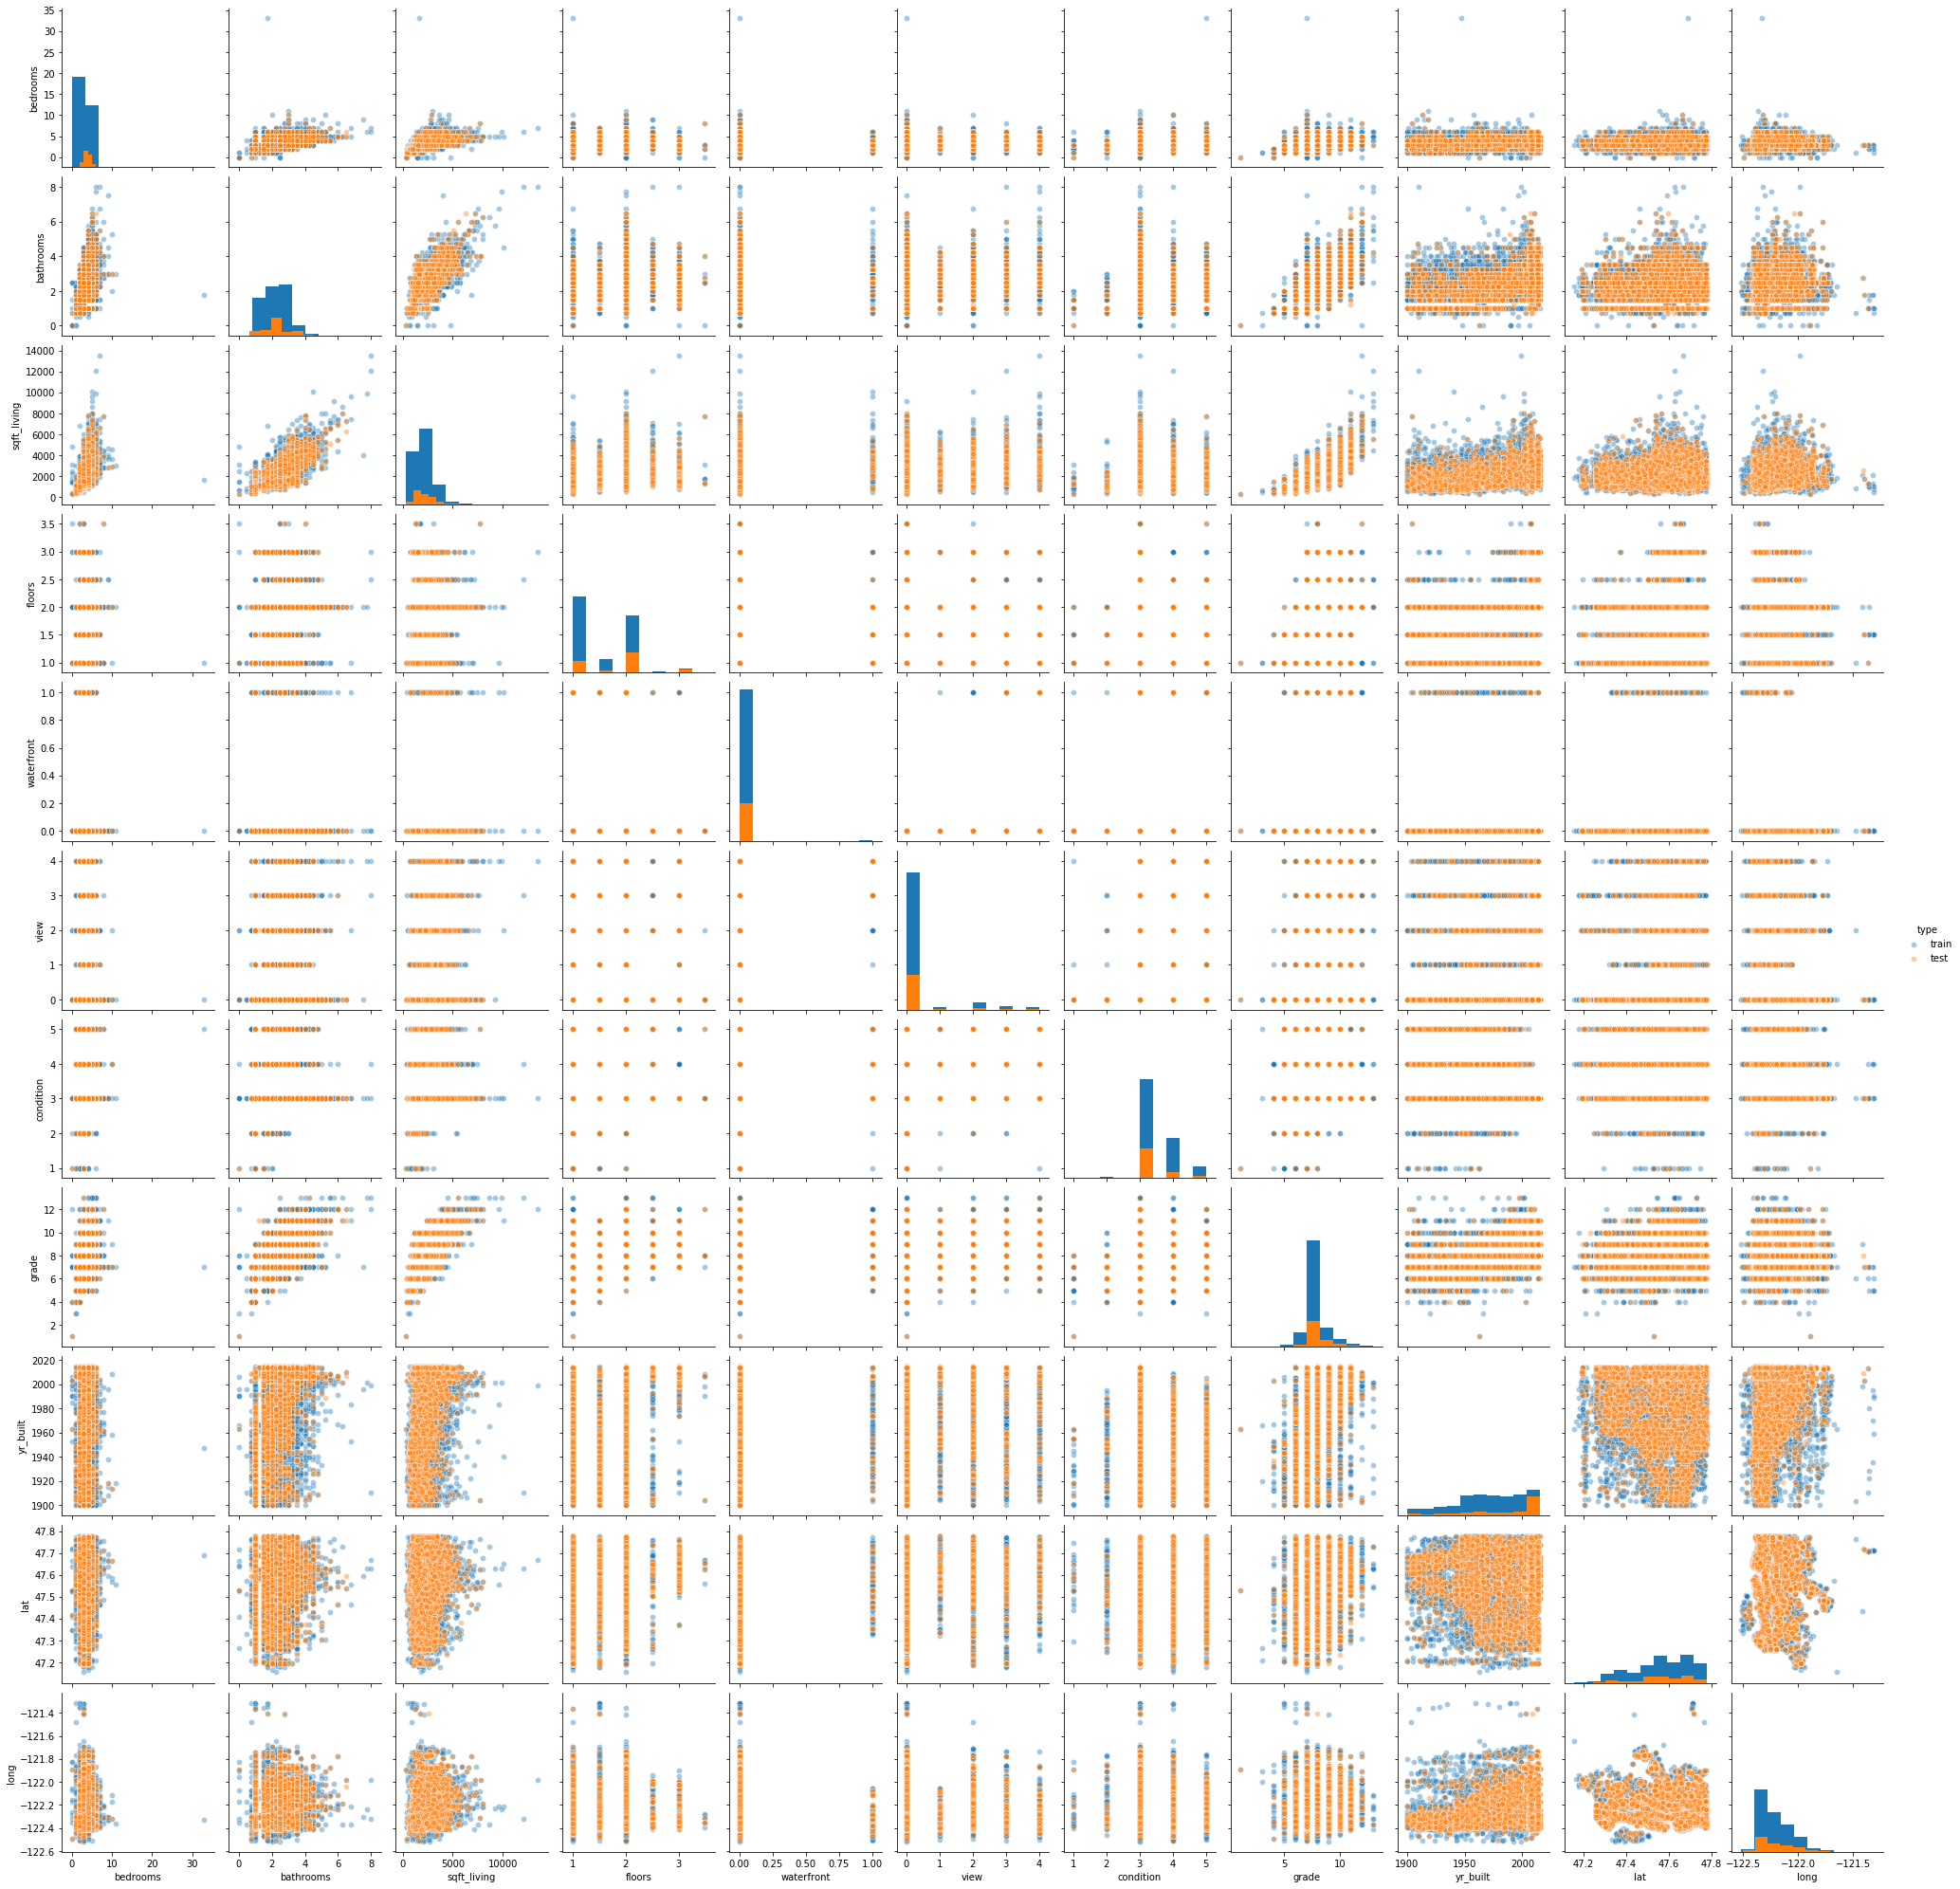

In [12]:
sns.pairplot(_eda,hue="type", diag_kind='hist', plot_kws={'alpha': 0.4})

In [13]:
_eda.corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,lat,long
bedrooms,1.000000,0.509246,0.583102,0.151275,-0.011546,0.075099,0.022775,0.356476,0.149723,-0.012662,0.139992
bathrooms,0.509246,1.000000,0.750388,0.492021,0.057061,0.178478,-0.143062,0.667087,0.518033,0.022335,0.221714
sqft_living,0.583102,0.750388,1.000000,0.322014,0.100286,0.276005,-0.066840,0.758381,0.313348,0.044326,0.251090
floors,0.151275,0.492021,0.322014,1.000000,0.016501,0.007585,-0.285935,0.451652,0.524093,0.059716,0.101193
waterfront,-0.011546,0.057061,0.100286,0.016501,1.000000,0.408881,0.015409,0.084644,-0.031393,-0.013871,-0.041388
view,0.075099,0.178478,0.276005,0.007585,0.408881,1.000000,0.050295,0.241013,-0.060997,0.005030,-0.072777
condition,0.022775,-0.143062,-0.066840,-0.285935,0.015409,0.050295,1.000000,-0.153458,-0.389211,-0.007335,-0.106745
grade,0.356476,0.667087,0.758381,0.451652,0.084644,0.241013,-0.153458,1.000000,0.454955,0.115964,0.192876
yr_built,0.149723,0.518033,0.313348,0.524093,-0.031393,-0.060997,-0.389211,0.454955,1.000000,-0.135242,0.376552
lat,-0.012662,0.022335,0.044326,0.059716,-0.013871,0.005030,-0.007335,0.115964,-0.135242,1.000000,-0.140630


In [14]:
abs(_eda.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,lat,long
bedrooms,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,False
waterfront,False,False,False,False,True,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False
grade,False,False,True,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False
lat,False,False,False,False,False,False,False,False,False,True,False


In [15]:
_df = _eda.corr().abs().stack().reset_index().sort_values(0, ascending=False)
_df['pairs'] = list(zip(_df.level_0, _df.level_1))
_df.set_index(['pairs'], inplace=True)
_df.drop(columns =['level_1', 'level_0'], inplace=True)
_df.columns = ['cc']
_df.drop_duplicates(inplace=True)
_df[(_df.cc>.75) & (_df.cc<1)]

,cc
pairs,
"(sqft_living, grade)",0.758381
"(bathrooms, sqft_living)",0.750388


In [16]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [17]:
result['year'] = result['date'].apply(lambda x: x[:4]).astype('int64')
result['month'] = result['date'].apply(lambda x: x[4:6]).astype('int64')


In [18]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [19]:
result.drop(['date'], axis = 1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,year,month
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train,2014,10
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train,2014,8
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train,2014,8
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train,2015,3
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train,2014,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,NaN,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test,2014,5
21609,6600060120,NaN,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,test,2015,2
21610,1523300141,NaN,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,test,2014,6
21611,291310100,NaN,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,test,2015,1


In [20]:
result['price_sqft'] = result['price']/result['sqft_living']

In [21]:
result[['sqft_living', 'price']][~np.isnan(result['price'])].corr()

,sqft_living,price
sqft_living,1.00000,0.70354
price,0.70354,1.00000


In [22]:
result['sqft_lot'].max()

1651359

In [23]:
result.loc[result['sqft_lot'].gt(1000000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,year,month,price_sqft
718,1020069017,20150327T000000,700000.0,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,train,2015,3,538.461538
11616,3326079016,20150504T000000,190000.0,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730,train,2015,5,267.605634
13460,2623069031,20140521T000000,542500.0,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825,train,2014,5,180.232558
16243,2323089009,20150119T000000,855000.0,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700,train,2015,1,212.158809
17319,3326079016,20150504T000000,NaN,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730,test,2015,5,NaN


In [24]:
result.loc[result['bedrooms'].eq(3)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,year,month,price_sqft
3,9522300010,20150331T000000,1490000.0,3,3.5,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train,2015,3,326.754386
4,9510861140,20140714T000000,711000.0,3,2.5,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train,2014,7,278.823529
7,7010701383,20141017T000000,680000.0,3,2.5,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400,train,2014,10,377.777778
8,291310170,20140804T000000,384500.0,3,2.5,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288,train,2014,8,240.312500
10,6840701125,20150422T000000,638000.0,3,1.0,1830,4400,1.5,0,0,4,8,1720,110,1930,0,98122,47.6052,-122.300,1650,4400,train,2015,4,348.633880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,NaN,3,2.5,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,test,2014,8,NaN
21604,9834201367,20150126T000000,NaN,3,2.0,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,test,2015,1,NaN
21607,2997800021,20150219T000000,NaN,3,2.5,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,test,2015,2,NaN
21608,263000018,20140521T000000,NaN,3,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test,2014,5,NaN


In [25]:
pd.get_dummies(result['view'])

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
21608,1,0,0,0,0
21609,1,0,0,0,0
21610,1,0,0,0,0
21611,1,0,0,0,0


In [26]:
pd.get_dummies(result, columns = ['view'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,year,month,price_sqft,view_0,view_1,view_2,view_3,view_4
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train,2014,10,176.328502,1,0,0,0,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train,2014,8,298.275862,1,0,0,0,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train,2014,8,275.331565,0,0,1,0,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train,2015,3,326.754386,0,0,1,0,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train,2014,7,278.823529,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,NaN,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test,2014,5,NaN,1,0,0,0,0
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,test,2015,2,NaN,1,0,0,0,0
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,test,2014,6,NaN,1,0,0,0,0
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,test,2015,1,NaN,1,0,0,0,0


In [27]:
result.loc[8597,'bedrooms'] = 3

In [28]:
result['age'] = 2020 - result['yr_built']

In [29]:
result['reno_age'] = np.where((result.yr_renovated.isnull), 0, result.reno_age)

AttributeError: 'DataFrame' object has no attribute 'reno_age'

In [30]:
result.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,price_sqft,age
id,1.000000,-0.015644,-0.000155,0.005415,-0.013709,-0.126388,0.021551,0.000698,0.010183,-0.018504,0.005744,-0.011186,-0.007566,0.016499,-0.017410,-0.004973,-0.000444,0.023649,0.000356,-0.135284,0.011684,-0.015061,-0.001959,-0.016499
price,-0.015644,1.000000,0.313775,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423,-0.002334,-0.004350,0.557401,-0.056450
bedrooms,-0.000155,0.313775,1.000000,0.522354,0.597992,0.028934,0.156409,-0.011691,0.077377,0.019437,0.366008,0.504787,0.297357,0.154695,0.013903,-0.164550,-0.014384,0.144638,0.414986,0.028063,-0.007868,-0.000376,-0.206218,-0.154695
bathrooms,0.005415,0.524335,0.522354,1.000000,0.750388,0.078552,0.492021,0.057061,0.178478,-0.143062,0.667087,0.685755,0.271928,0.518033,0.039254,-0.203897,0.022335,0.221714,0.559684,0.081778,-0.025572,0.007157,-0.085434,-0.518033
sqft_living,-0.013709,0.703540,0.597992,0.750388,1.000000,0.162483,0.322014,0.100286,0.276005,-0.066840,0.758381,0.883291,0.421524,0.313348,0.045229,-0.212131,0.044326,0.251090,0.757094,0.179669,-0.030147,0.012069,-0.083806,-0.313348
sqft_lot,-0.126388,0.086803,0.028934,0.078552,0.162483,1.000000,-0.022865,0.016157,0.077316,-0.004970,0.099169,0.171932,0.013535,0.030283,0.004530,-0.128612,-0.081060,0.227143,0.127570,0.704779,0.008497,-0.003290,-0.029611,-0.030283
floors,0.021551,0.256985,0.156409,0.492021,0.322014,-0.022865,1.000000,0.016501,0.007585,-0.285935,0.451652,0.486536,-0.255180,0.524093,-0.013096,-0.046247,0.059716,0.101193,0.247413,-0.029246,-0.021716,0.016279,0.004718,-0.524093
waterfront,0.000698,0.275779,-0.011691,0.057061,0.100286,0.016157,0.016501,1.000000,0.408881,0.015409,0.084644,0.068475,0.081163,-0.031393,0.100528,0.032881,-0.013871,-0.041388,0.085658,0.027105,0.000520,0.002550,0.201687,0.031393
view,0.010183,0.395485,0.077377,0.178478,0.276005,0.077316,0.007585,0.408881,1.000000,0.050295,0.241013,0.157029,0.284164,-0.060997,0.095737,0.085162,0.005030,-0.072777,0.270904,0.079108,0.001459,-0.006822,0.224091,0.060997
condition,-0.018504,0.036099,0.019437,-0.143062,-0.066840,-0.004970,-0.285935,0.015409,0.050295,1.000000,-0.153458,-0.163510,0.173896,-0.389211,-0.050060,0.011035,-0.007335,-0.106745,-0.094033,0.003408,-0.043002,0.016567,0.107385,0.389211


In [31]:
train_df['price_sqft'] = train_df['price']/train_df['sqft_living']

In [32]:
train_df[['sqft_living', 'price']][~np.isnan(train_df['price'])].corr()

,sqft_living,price
sqft_living,1.00000,0.70354
price,0.70354,1.00000


In [33]:
train_df[['price_sqft', 'price']][~np.isnan(train_df['price'])].corr()

,price_sqft,price
price_sqft,1.000000,0.557401
price,0.557401,1.000000


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [34]:
# your code here
pd.get_dummies(result['view'])

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
21608,1,0,0,0,0
21609,1,0,0,0,0
21610,1,0,0,0,0
21611,1,0,0,0,0


In [37]:
_result = pd.get_dummies(data = result, columns = ['view'], drop_first = True)

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [39]:
#your code here
_result['date']

0        20141006T000000
1        20140821T000000
2        20140815T000000
3        20150331T000000
4        20140714T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [ ]:
pd.to_datetime(_result['date'], format = '%Y%m%d')

In [41]:
_result['date'] = pd.to_datetime(_result['date'])

In [42]:
_result['date_year'] = _result['date'].dt.year

In [43]:
_result['date_year']

0        2014
1        2014
2        2014
3        2015
4        2014
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date_year, Length: 21613, dtype: int64

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [49]:
_result['date_age'] = 2020 - _result['yr_built']

In [50]:
_result['date_age'].describe()

count    21613.000000
mean        46.256975
std         30.175427
min          5.000000
25%         18.000000
50%         42.000000
75%         67.000000
max        120.000000
Name: date_age, dtype: float64

In [52]:
_result['yr_renovated'].isna().sum()

0

In [53]:
_result['reno_age'] = np.where(_result['yr_renovated'] > 0, 2020 - _result['yr_renovated'], 0)

In [55]:
#your code here 
_result['reno_age'].value_counts()

0     20748
6        84
13       42
7        37
15       36
      ...  
86        1
76        1
72        1
61        1
69        1
Name: reno_age, Length: 69, dtype: int64

In [57]:
_result.loc[_result['bedrooms'].eq(0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,year,month,price_sqft,age,view_1,view_2,view_3,view_4,date_year,date_age,reno_age
483,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,train,2015,4,144.308943,30,0,0,0,0,2015,30,0
1120,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,train,2014,6,357.375979,30,0,1,0,0,2014,30,0
2430,1222029077,2014-10-29,265000.0,0,0.75,384,213444,1.0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341,train,2014,10,690.104167,17,0,0,0,0,2014,17,0
3032,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,train,2014,12,159.863946,24,0,0,0,0,2014,24,0
3609,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,train,2014,11,148.449782,35,0,0,0,0,2014,35,0
5424,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,train,2015,2,258.503401,14,0,1,0,0,2015,14,0
6409,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,train,2014,8,201.398601,21,0,0,0,0,2014,21,0
9286,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,train,2014,6,269.365904,30,0,0,0,0,2014,30,0
10067,3980300371,2014-09-26,142000.0,0,0.00,290,20875,1.0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,train,2014,9,489.655172,57,0,0,0,0,2014,57,0
10074,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,train,2014,9,132.596685,17,0,0,0,0,2014,17,0


### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [11]:
# your code here
_result['rot45x'] = .707 * _result['']

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [12]:
# your code here

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [144]:
dummy = pd.get_dummies(train_df, columns=['year', 'month', 'waterfront', 'view', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade'])

In [145]:
dummy.head()

,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,price_sqft,price_log,sqft_living_log,date_age,reno_age,year_2014,year_2015,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.0,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,2591820310,2014-10-06,365000.0,2070,8893,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train,176.328502,12.807653,7.635304,34,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,7974200820,2014-08-21,865000.0,2900,6730,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train,298.275862,13.670485,7.972466,43,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,7701450110,2014-08-15,1038000.0,3770,10893,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train,275.331565,13.852806,8.234830,23,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9522300010,2015-03-31,1490000.0,4560,14608,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train,326.754386,14.214287,8.425078,30,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,9510861140,2014-07-14,711000.0,2550,5376,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train,278.823529,13.474428,7.843849,16,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [195]:
_X = dummy.drop(columns = ['price_log', 'price_sqft', 'sqft_basement', 'id', 'date', 'price', 'yr_built', 'yr_renovated', 'zipcode', 'type'])

In [196]:
poly_2 = PolynomialFeatures(degree = 2, include_bias = False)

In [197]:
poly_2_data = poly_2.fit_transform(_X)

In [198]:
poly_2_columns = poly_2.get_feature_names(_X.columns)

In [199]:
_X_poly2_df = pd.DataFrame(poly_2_data, columns = poly_2_columns)

In [200]:
_X.head()

,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15,sqft_living_log,date_age,reno_age,year_2014,year_2015,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.0,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,2070,8893,2070,47.4388,-122.162,2390,7700,7.635304,34,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2900,6730,1830,47.6784,-122.285,2370,6283,7.972466,43,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3770,10893,3770,47.5646,-122.129,3710,9685,8.234830,23,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4560,14608,4560,47.6995,-122.228,4050,14226,8.425078,30,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2550,5376,2550,47.6647,-122.083,2250,4050,7.843849,16,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [203]:
_X_poly2_df.drop(columns = ['year_2014', 'month_1', 'waterfront_0', 'view_0', 'bedrooms_0', 'bathrooms_0.0', 'floors_1.0', 'condition_1', 'grade_1'], inplace = True)

In [204]:
_X

,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15,sqft_living_log,date_age,reno_age,year_2014,year_2015,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.0,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,2070,8893,2070,47.4388,-122.162,2390,7700,7.635304,34,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2900,6730,1830,47.6784,-122.285,2370,6283,7.972466,43,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3770,10893,3770,47.5646,-122.129,3710,9685,8.234830,23,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4560,14608,4560,47.6995,-122.228,4050,14226,8.425078,30,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2550,5376,2550,47.6647,-122.083,2250,4050,7.843849,16,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,3240,9960,2020,47.5858,-122.112,2730,10400,8.083329,62,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17286,1300,4000,1300,47.6687,-122.288,1350,4013,7.170120,72,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17287,1050,9876,1050,47.7635,-122.262,1760,9403,6.956545,67,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17288,1900,43186,1300,47.4199,-121.990,2080,108028,7.549609,49,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [205]:
_X_poly2_df.head()

,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15,sqft_living_log,date_age,reno_age,year_2015,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,waterfront_1,view_1,view_2,view_3,view_4,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,sqft_living^2,sqft_living sqft_lot,sqft_living sqft_above,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sqft_living_log,sqft_living date_age,sqft_living reno_age,sqft_living year_2014,sqft_living year_2015,sqft_living month_1,sqft_living month_2,sqft_living month_3,sqft_living month_4,sqft_living month_5,sqft_living month_6,sqft_living month_7,sqft_living month_8,sqft_living month_9,sqft_living month_10,sqft_living month_11,sqft_living month_12,sqft_living waterfront_0,sqft_living waterfront_1,sqft_living view_0,sqft_living view_1,sqft_living view_2,sqft_living view_3,sqft_living view_4,sqft_living bedrooms_0,sqft_living bedrooms_1,sqft_living bedrooms_2,sqft_living bedrooms_3,sqft_living bedrooms_4,sqft_living bedrooms_5,sqft_living bedrooms_6,sqft_living bedrooms_7,sqft_living bedrooms_8,sqft_living bedrooms_9,sqft_living bedrooms_10,sqft_living bedrooms_11,sqft_living bathrooms_0.0,sqft_living bathrooms_0.5,sqft_living bathrooms_0.75,sqft_living bathrooms_1.0,sqft_living bathrooms_1.25,sqft_living bathrooms_1.5,sqft_living bathrooms_1.75,sqft_living bathrooms_2.0,sqft_living bathrooms_2.25,sqft_living bathrooms_2.5,sqft_living bathrooms_2.75,sqft_living bathrooms_3.0,sqft_living bathrooms_3.25,sqft_living bathrooms_3.5,sqft_living bathrooms_3.75,sqft_living bathrooms_4.0,sqft_living bathrooms_4.25,sqft_living bathrooms_4.5,sqft_living bathrooms_4.75,sqft_living bathrooms_5.0,sqft_living bathrooms_5.25,sqft_living bathrooms_5.5,sqft_living bathrooms_5.75,sqft_living bathrooms_6.0,sqft_living bathrooms_6.25,sqft_living bathrooms_6.5,sqft_living bathrooms_6.75,sqft_living bathrooms_7.5,sqft_living bathrooms_7.75,sqft_living bathrooms_8.0,sqft_living floors_1.0,sqft_living floors_1.5,sqft_living floors_2.0,sqft_living floors_2.5,sqft_living floors_3.0,sqft_living floors_3.5,sqft_living condition_1,sqft_living condition_2,sqft_living condition_3,sqft_living condition_4,sqft_living condition_5,sqft_living grade_1,sqft_living grade_3,sqft_living grade_4,sqft_living grade_5,sqft_living grade_6,sqft_living grade_7,sqft_living grade_8,sqft_living grade_9,sqft_living grade_10,sqft_living grade_11,sqft_living grade_12,sqft_living grade_13,sqft_lot^2,sqft_lot sqft_above,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot sqft_living_log,sqft_lot date_age,sqft_lot reno_age,sqft_lot year_2014,sqft_lot year_2015,sqft_lot month_1,sqft_lot month_2,sqft_lot month_3,sqft_lot month_4,sqft_lot month_5,sqft_lot month_6,sqft_lot month_7,sqft_lot month_8,sqft_lot month_9,sqft_lot month_10,sqft_lot month_11,sqft_lot month_12,sqft_lot waterfront_0,sqft_lot waterfront_1,sqft_lot view_0,sqft_lot view_1,sqft_lot view_2,sqft_lot view_3,sqft_lot view_4,sqft_lot bedrooms_0,sqft_lot bedrooms_1,sqft_lot bedrooms_2,sqft_lot bedrooms_3,sqft_lot bedrooms_4,sqft_lot bedrooms_5,sqft_lot bedrooms_6,sqft_lot bedrooms_7,sqft_lot bedrooms_8,sqft_lot bedrooms_9,sqft_lot bedrooms_10,sqft_lot bedrooms_11,sqft_lot bathrooms_0.0,sqft_lo

In [243]:
scaler = StandardScaler()

In [257]:
scale_df = pd.DataFrame(scaler.fit_transform(_X_poly2_df), columns = _X_poly2_df.columns)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(scale_df, y, random_state = 42, test_size = .2)
# linreg = LinearRegression()
# linreg = linreg.fit(X_train, y_train)
# y_train_pred = linreg.predict(X_train)
# np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [259]:
selector = SelectKBest(f_regression, k=50)

In [260]:
selector.fit(X_train, y_train)

/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=50, score_func=<function f_regression at 0x7fb79624bdd0>)

In [261]:
selected_columns = X_train.columns[selector.get_support()]

In [262]:
list(selected_columns)

['sqft_living',
 'sqft_above',
 'lat',
 'sqft_living15',
 'sqft_living_log',
 'bathrooms_1.0',
 'grade_7',
 'sqft_living^2',
 'sqft_living sqft_above',
 'sqft_living lat',
 'sqft_living long',
 'sqft_living sqft_living15',
 'sqft_living sqft_living_log',
 'sqft_living date_age',
 'sqft_living year_2014',
 'sqft_living waterfront_0',
 'sqft_living bedrooms_4',
 'sqft_living floors_2.0',
 'sqft_living condition_3',
 'sqft_living grade_10',
 'sqft_above^2',
 'sqft_above lat',
 'sqft_above long',
 'sqft_above sqft_living15',
 'sqft_above sqft_living_log',
 'sqft_above waterfront_0',
 'sqft_above floors_2.0',
 'lat^2',
 'lat long',
 'lat sqft_living15',
 'lat sqft_living_log',
 'lat bathrooms_1.0',
 'long sqft_living15',
 'long sqft_living_log',
 'long bathrooms_1.0',
 'long grade_7',
 'sqft_living15^2',
 'sqft_living15 sqft_living_log',
 'sqft_living15 waterfront_0',
 'sqft_living15 floors_2.0',
 'sqft_living_log^2',
 'sqft_living_log bathrooms_1.0',
 'waterfront_0 bathrooms_1.0',
 'waterf

In [263]:
lm_kbest = LinearRegression()

In [264]:
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

In [265]:
y_train_kbest = lm_kbest.predict(X_train[selected_columns])

In [266]:
np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_kbest)))

205461.58437431988

In [267]:
y_kbest = lm_kbest.predict(X_test[selected_columns])

In [268]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_kbest)))

188793.20916023484

In [174]:
np.exp(y_kbest)

array([300011.01030746, 850046.26258652, 332513.33240935, ...,
       238960.20414159, 949967.35559082, 385011.36945562])

In [273]:
lasso = Lasso(alpha = 0.01, normalize = False)

In [274]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [275]:
y_train_lasso = lasso.predict(X_train)

In [276]:
y_pred_lasso = lasso.predict(X_test)

In [277]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_lasso)))

191708.57345631134

In [280]:
np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_lasso)))

190476.2525947882

In [ ]:
train_df['year'] = train_df['date'].apply(lambda x: x[:4]).astype('int64')
train_df['month'] = train_df['date'].apply(lambda x: x[4:6]).astype('int64')

In [140]:
train_df['price_sqft'] = train_df['price']/train_df['sqft_living']
train_df.loc[8597,'bedrooms'] = 3
train_df['date_age'] = 2020 - train_df['yr_built']
train_df['reno_age'] = np.where(train_df['yr_renovated'] > 2010, 1, 0)
train_df['date'] = pd.to_datetime(train_df['date'])

In [142]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,price_sqft,price_log,sqft_living_log,year,month,date_age,reno_age
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train,176.328502,12.807653,7.635304,2014,10,34,0
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train,298.275862,13.670485,7.972466,2014,8,43,0
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train,275.331565,13.852806,8.234830,2014,8,23,0
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train,326.754386,14.214287,8.425078,2015,3,30,0
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train,278.823529,13.474428,7.843849,2014,7,16,0


In [131]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,price_sqft,price_log,sqft_living_log
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train,176.328502,12.807653,7.635304
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train,298.275862,13.670485,7.972466
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train,275.331565,13.852806,8.234830
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train,326.754386,14.214287,8.425078
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train,278.823529,13.474428,7.843849


In [ ]:
train_df['sqft_living_log'] = np.log(train_df['sqft_living'])
train_df['price_log'] = np.log(train_df['price'])

In [269]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [116]:
y = train_df['price_log']
X = train_df[['bedrooms', 'sqft_living_log']]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2)
linreg = LinearRegression()
linreg = linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

0.38592347423621365

In [118]:
y_test_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))

275110.6081818313

In [107]:
y_test_pred

array([12.73896874, 13.42936143, 12.81903714, ..., 12.73090249,
       13.16423348, 13.02480531])

In [119]:
linreg.coef_

array([-0.06200731,  0.92541746])

In [122]:
poly_2 = PolynomialFeatures(degree=2, include_bias = False)

In [123]:
poly_2x = poly_2.fit_transform(X)

In [124]:
poly_2x

array([[ 4.        ,  7.63530389, 16.        , 30.54121555, 58.29786544],
       [ 5.        ,  7.97246602, 25.        , 39.86233008, 63.56021438],
       [ 4.        ,  8.23483028, 16.        , 32.93932112, 67.81242975],
       ...,
       [ 3.        ,  6.95654544,  9.        , 20.86963633, 48.3935245 ],
       [ 3.        ,  7.54960917,  9.        , 22.6488275 , 56.99659855],
       [ 3.        ,  7.19293422,  9.        , 21.57880266, 51.73830271]])

In [126]:
poly_2x_columns = poly_2.get_feature_names(X.columns)

In [128]:
poly_2x_df = pd.DataFrame(poly_2x, columns= poly_2x_columns)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(poly_2x_df, y, random_state = 42, test_size = .2)
linreg = LinearRegression()
linreg = linreg.fit(X_train, y_train)
y_train_pred = linreg.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

0.3748633785355

250627.25409339872

263061.0796856743

256021.29551438228

### 5.2) Fit your scaler to training the data.

In [14]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [15]:
#your code here 

### 5.4) Fit the model to the training data.

In [16]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [17]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [18]:
#your code here 

### 5.7) Determine if your model is overfit.

In [19]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [20]:
# your code here

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [21]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/